In [1]:
#!pip install wordcloud
#!pip install textblob

In [1]:
# ==============================
# 1. Setup & Load Data
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Load dataset
df = pd.read_excel("Khoo Teck Puat Hospitalv2.xlsx")

# Display basic info
print(df.shape)
df.head()

(600, 35)


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,0x31da146c6e9a63af:0x6961b610a7be48b9,Khoo Teck Puat Hospital,0x31da146c6e9a63af:0x6961b610a7be48b9,ChIJr2OabmwU2jERuUi-pxC2YWk,https://www.google.com/maps/place/Khoo+Teck+Pu...,https://search.google.com/local/reviews?placei...,1186,2.7,Ci9DQUlRQUNvZENodHljRjlvT2xGUGJtZENSWGRFTmtOQl...,CAESYENBRVFBUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMk...,...,3,1756279172,08/27/2025 07:19:32,NaN,7593550629373364409,588,60,50,99,389
1,0x31da146c6e9a63af:0x6961b610a7be48b9,Khoo Teck Puat Hospital,0x31da146c6e9a63af:0x6961b610a7be48b9,ChIJr2OabmwU2jERuUi-pxC2YWk,https://www.google.com/maps/place/Khoo+Teck+Pu...,https://search.google.com/local/reviews?placei...,1186,2.7,Ci9DQUlRQUNvZENodHljRjlvT25WcFMyRjJiRkp3WjJoRV...,CAESY0NBRVFBaHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,1,1755755011,08/21/2025 05:43:31,NaN,7593550629373364409,588,60,50,99,389
2,0x31da146c6e9a63af:0x6961b610a7be48b9,Khoo Teck Puat Hospital,0x31da146c6e9a63af:0x6961b610a7be48b9,ChIJr2OabmwU2jERuUi-pxC2YWk,https://www.google.com/maps/place/Khoo+Teck+Pu...,https://search.google.com/local/reviews?placei...,1186,2.7,Ci9DQUlRQUNvZENodHljRjlvT2xjMmJYVnRjMWhoYXpCTl...,CAESY0NBRVFBeHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,1,1755657439,08/20/2025 02:37:19,NaN,7593550629373364409,588,60,50,99,389
3,0x31da146c6e9a63af:0x6961b610a7be48b9,Khoo Teck Puat Hospital,0x31da146c6e9a63af:0x6961b610a7be48b9,ChIJr2OabmwU2jERuUi-pxC2YWk,https://www.google.com/maps/place/Khoo+Teck+Pu...,https://search.google.com/local/reviews?placei...,1186,2.7,ChZDSUhNMG9nS0VMSDc0SlctdnY2a0RREAE,CAESY0NBRVFCQnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMl...,...,1,1755492069,08/18/2025 04:41:09,NaN,7593550629373364409,588,60,50,99,389
4,0x31da146c6e9a63af:0x6961b610a7be48b9,Khoo Teck Puat Hospital,0x31da146c6e9a63af:0x6961b610a7be48b9,ChIJr2OabmwU2jERuUi-pxC2YWk,https://www.google.com/maps/place/Khoo+Teck+Pu...,https://search.google.com/local/reviews?placei...,1186,2.7,Ci9DQUlRQUNvZENodHljRjlvT25GWFozVkxkR3g1U0ZCb1...,CAESYENBRVFCUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMl...,...,5,1755136721,08/14/2025 01:58:41,NaN,7593550629373364409,588,60,50,99,389


In [2]:
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews', 'rating', 'review_id',
       'review_pagination_id', 'author_link', 'author_title', 'author_id',
       'author_image', 'author_reviews_count', 'author_ratings_count',
       'review_text', 'review_img_urls', 'review_img_url', 'review_questions',
       'review_photo_ids', 'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating',
       'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                600 non-null    object 
 1   name                                 600 non-null    object 
 2   google_id                            600 non-null    object 
 3   place_id                             600 non-null    object 
 4   location_link                        600 non-null    object 
 5   reviews_link                         600 non-null    object 
 6   reviews                              600 non-null    int64  
 7   rating                               600 non-null    float64
 8   review_id                            600 non-null    object 
 9   review_pagination_id                 600 non-null    object 
 10  author_link                          600 non-null    object 
 11  author_title                    

In [4]:
# ==============================
# 2. Data Cleaning
# ==============================
# Remove duplicates
df = df.drop_duplicates()

# Convert datetime column
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')

# Add review text length
df['review_length'] = df['review_text'].astype(str).apply(len)

# Check missing values
print(df.isna().sum())


query                                    0
name                                     0
google_id                                0
place_id                                 0
location_link                            0
reviews_link                             0
reviews                                  0
rating                                   0
review_id                                0
review_pagination_id                     0
author_link                              0
author_title                             0
author_id                                0
author_image                             0
author_reviews_count                     0
author_ratings_count                     0
review_text                            118
review_img_urls                        558
review_img_url                         558
review_questions                       600
review_photo_ids                       558
owner_answer                           600
owner_answer_timestamp                 600
owner_answe

In [5]:
# ==============================
# 3. Descriptive Statistics
# ==============================
print(df['review_rating'].describe())
print(df['review_length'].describe())

print("Reviewer reviews count stats:")
print(df['author_reviews_count'].describe())

print("Reviewer ratings count stats:")
print(df['author_ratings_count'].describe())

print("Owner response rate:", df['owner_answer'].notna().mean())


count    600.000000
mean       2.335000
std        1.771442
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64
count     600.000000
mean      386.290000
std       542.158472
min         1.000000
25%        33.250000
50%       213.500000
75%       509.750000
max      4093.000000
Name: review_length, dtype: float64
Reviewer reviews count stats:
count    600.000000
mean      29.903333
std       75.944431
min        0.000000
25%        3.000000
50%        8.000000
75%       24.000000
max      865.000000
Name: author_reviews_count, dtype: float64
Reviewer ratings count stats:
count    600.000000
mean      10.513333
std       35.824510
min        0.000000
25%        0.000000
50%        2.000000
75%        5.000000
max      419.000000
Name: author_ratings_count, dtype: float64
Owner response rate: 0.0


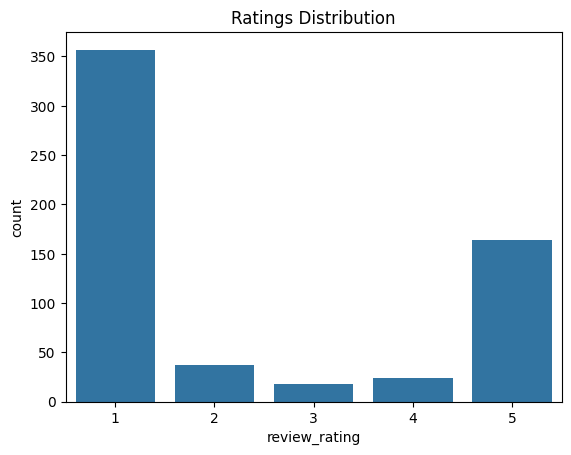

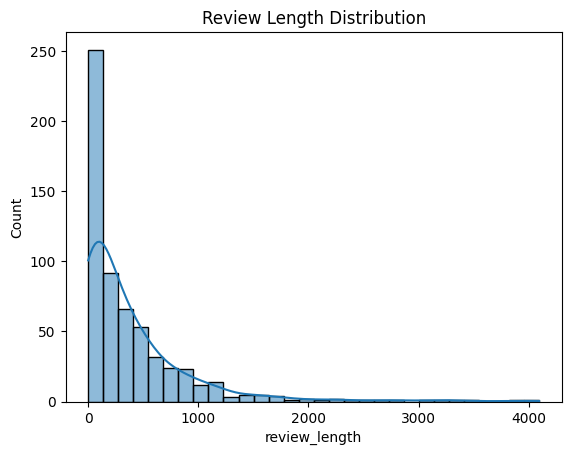

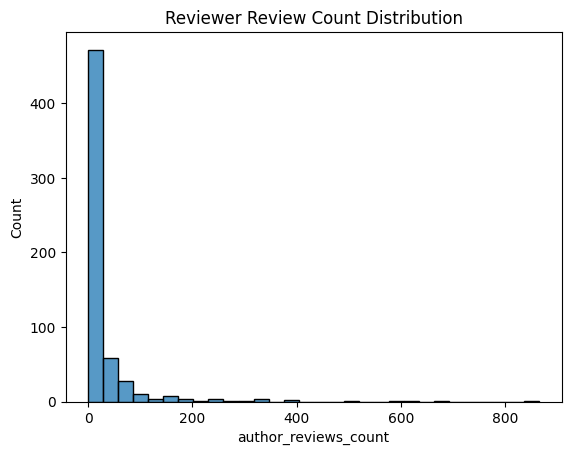

In [6]:
# ==============================
# 4. Univariate Analysis
# ==============================
sns.countplot(x='review_rating', data=df)
plt.title("Ratings Distribution")
plt.show()

sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()

sns.histplot(df['author_reviews_count'], bins=30)
plt.title("Reviewer Review Count Distribution")
plt.show()


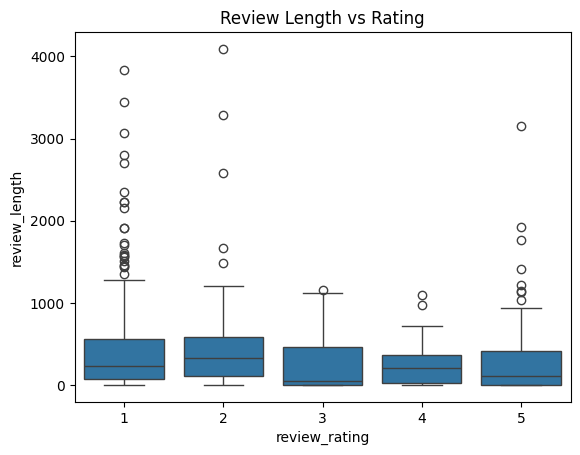

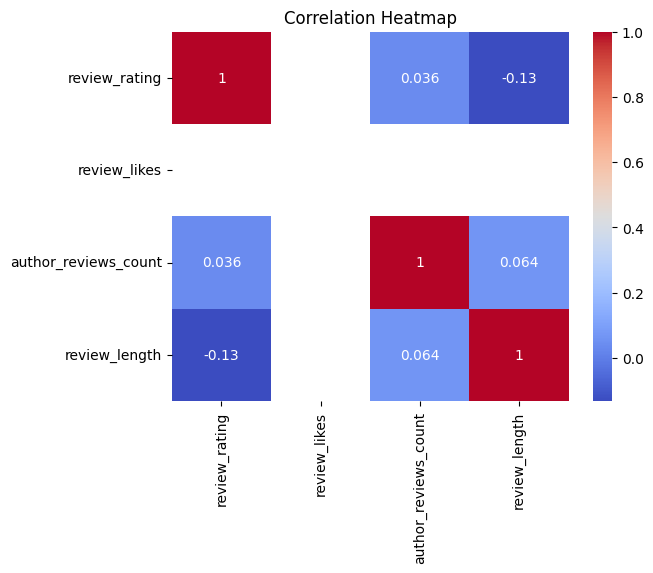

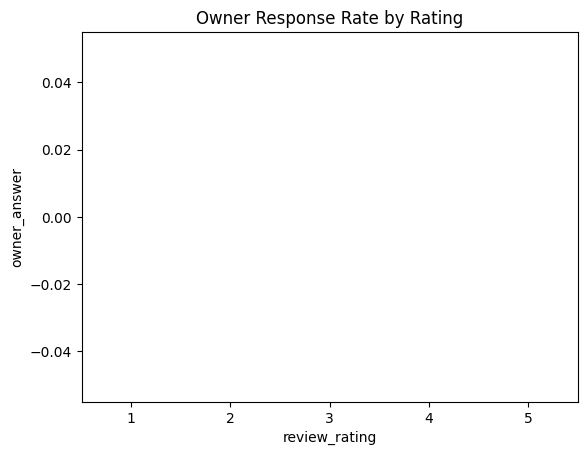

In [7]:
# ==============================
# 5. Bivariate Analysis
# ==============================
sns.boxplot(x='review_rating', y='review_length', data=df)
plt.title("Review Length vs Rating")
plt.show()

sns.heatmap(df[['review_rating','review_likes','author_reviews_count','review_length']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.barplot(x='review_rating', y=df['owner_answer'].notna(), data=df, estimator=np.mean)
plt.title("Owner Response Rate by Rating")
plt.show()


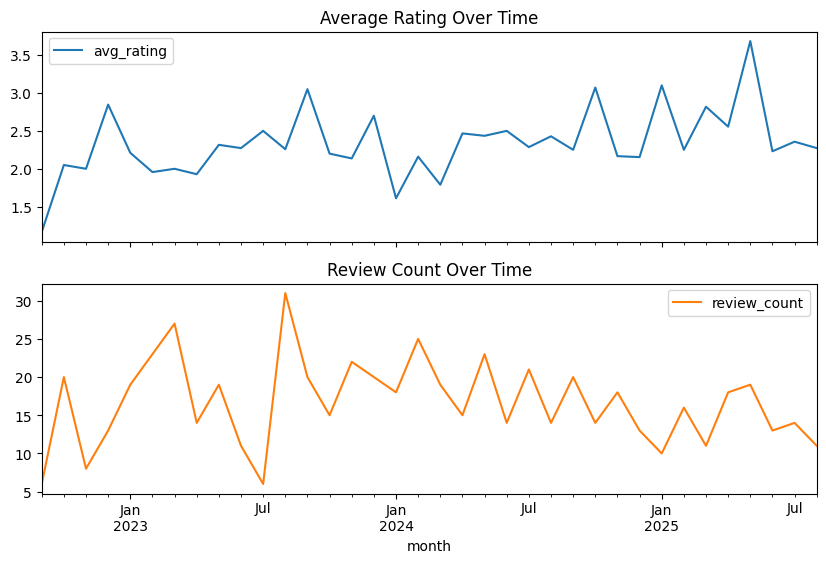

In [8]:
# ==============================
# 6. Time-based Analysis
# ==============================
df['month'] = df['review_datetime_utc'].dt.to_period("M")

monthly = df.groupby('month').agg(
    avg_rating=('review_rating','mean'),
    review_count=('review_rating','count')
)

monthly.plot(y=['avg_rating','review_count'], subplots=True, figsize=(10,6),
             title=["Average Rating Over Time","Review Count Over Time"])
plt.show()


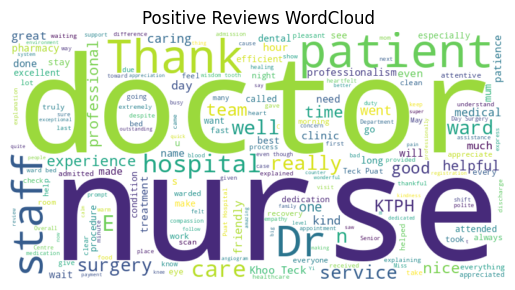

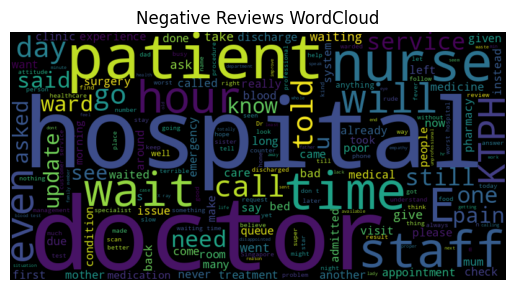

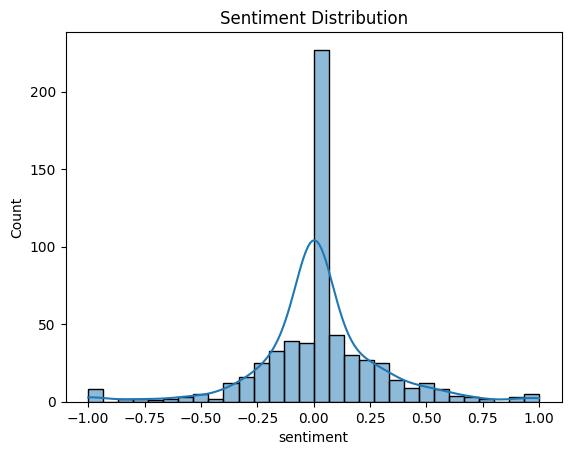

In [9]:
# ==============================
# 7. Text Analysis (WordCloud + Sentiment)
# ==============================
# Positive reviews wordcloud
positive_text = " ".join(df[df['review_rating'] >= 4]['review_text'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

# Negative reviews wordcloud
negative_text = " ".join(df[df['review_rating'] <= 2]['review_text'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()

# Sentiment polarity
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()


Top Reviewers:
author_title
Sarah Yee           2
Sapy Jun            1
Sarah Chua          1
Sarah Grace         1
Sarimah Doud        1
Sean Seah           1
Seet Xinwen         1
Selina Sebastian    1
Afshar Sanam        1
Seridewi M Andy     1
dtype: int64


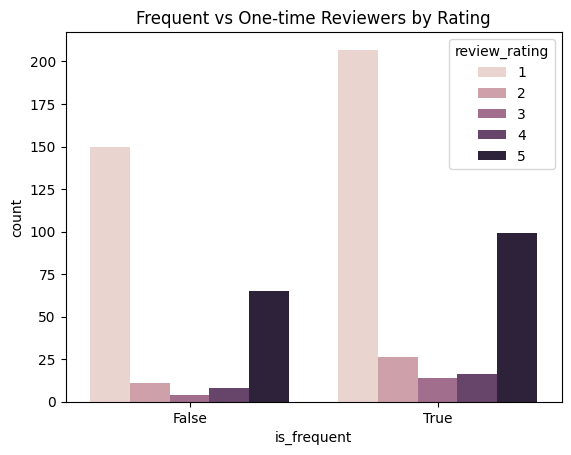

In [10]:
# ==============================
# 8. Reviewer Insights
# ==============================
top_reviewers = df.groupby('author_title').size().sort_values(ascending=False).head(10)
print("Top Reviewers:")
print(top_reviewers)

df['is_frequent'] = df['author_reviews_count'] > 5
sns.countplot(x='is_frequent', hue='review_rating', data=df)
plt.title("Frequent vs One-time Reviewers by Rating")
plt.show()


In [11]:
# ==============================
# 9. Owner Response Analysis
# ==============================
neg = df[df['review_rating'] <= 2]
pos = df[df['review_rating'] >= 4]

print("Response rate for negative reviews:", neg['owner_answer'].notna().mean())
print("Response rate for positive reviews:", pos['owner_answer'].notna().mean())


Response rate for negative reviews: 0.0
Response rate for positive reviews: 0.0


In [12]:
# ==============================
# 10. Aggregate Check
# ==============================
agg_counts = {
    "1_star": df['reviews_per_score_1'].iloc[0],
    "2_star": df['reviews_per_score_2'].iloc[0],
    "3_star": df['reviews_per_score_3'].iloc[0],
    "4_star": df['reviews_per_score_4'].iloc[0],
    "5_star": df['reviews_per_score_5'].iloc[0],
}
print("Aggregated counts from metadata:", agg_counts)

actual_counts = df['review_rating'].value_counts()
print("Actual counts from reviews:", actual_counts)


Aggregated counts from metadata: {'1_star': 588, '2_star': 60, '3_star': 50, '4_star': 99, '5_star': 389}
Actual counts from reviews: review_rating
1    357
5    164
2     37
4     24
3     18
Name: count, dtype: int64


#### 🏥 Google Reviews EDA + NLP Extension

In [13]:
# ==============================
# 11. Keyword Extraction (TF-IDF)
# ==============================
from sklearn.feature_extraction.text import TfidfVectorizer

# Use only non-null review text
texts = df['review_text'].dropna().astype(str)

# Vectorize reviews
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(texts)

# Top keywords
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)

print("Top Keywords (TF-IDF):")
print(keywords.head(20))


Top Keywords (TF-IDF):
     keyword      score
4   hospital  77.193482
1     doctor  53.469289
15      time  49.138626
14     staff  45.255509
13   service  43.351220
17      wait  41.732105
11   patient  41.192058
18   waiting  39.065517
10    nurses  37.994901
6       just  35.634364
5      hours  34.208832
9      nurse  33.523920
12  patients  32.950075
7       ktph  32.863263
3         dr  31.590049
2    doctors  29.266746
0       care  28.017219
19      ward  26.976394
8       like  26.577268
16      told  23.366872


In [14]:
# ==============================
# 12. Topic Modeling (LDA)
# ==============================
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Count vectorizer for LDA
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(texts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")

display_topics(lda, cv.get_feature_names_out())


Topic 1:
nurses | dr | ward | care | staff | hospital | thank | doctors | patients | patient


Topic 2:
hospital | doctor | patient | wait | worst | nurse | patients | care | medical | clinic


Topic 3:
hospital | doctor | patient | time | surgery | mum | just | nurse | pain | blood


Topic 4:
doctor | hospital | said | hours | time | wait | told | update | went | waiting


Topic 5:
staff | time | service | wait | waiting | queue | pharmacy | long | people | ktph




/var/tmp/ipykernel_4211/1274790882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['dominant_topic'] = topic_values.argmax(axis=1)


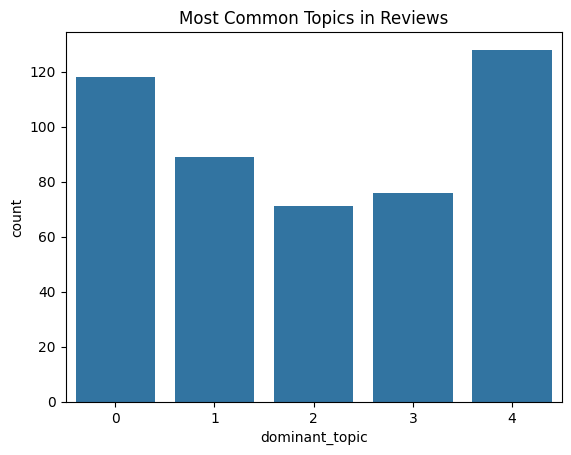

In [15]:
# ==============================
# 13. Topic Distribution per Review
# ==============================
topic_values = lda.transform(cv_matrix)

# Create a new DataFrame with the same index as cv_matrix to ensure alignment
# This assumes cv_matrix was created from a subset of df
df_subset = df.iloc[cv_matrix.index] if hasattr(cv_matrix, 'index') else df.head(len(topic_values))

# Add dominant topic to this subset
df_subset['dominant_topic'] = topic_values.argmax(axis=1)

# Plot with the correctly aligned data
sns.countplot(x='dominant_topic', data=df_subset)
plt.title("Most Common Topics in Reviews")
plt.show()

# Alternatively, if you need to keep the original df intact:
# Create a temporary DataFrame for plotting
# temp_df = pd.DataFrame({'dominant_topic': topic_values.argmax(axis=1)})
# sns.countplot(x='dominant_topic', data=temp_df)

# Assistant
This error occurs because the length of the `topic_values` array (146) doesn't match the length of your DataFrame `df` (185). This mismatch happens when you try to assign the `dominant_topic` column to your DataFrame.

The most likely cause is that your `cv_matrix` (CountVectorizer or TF-IDF matrix) was created using a subset of your data, or some rows were filtered out during preprocessing (perhaps due to empty reviews after text cleaning).

Would you like me to provide the corrected code?

# KPI Metrics

In [16]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Ensure datetime and review length are present
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')
df['review_length'] = df['review_text'].astype(str).apply(len)
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


# ⭐ 1. Ratings-Based Metrics

In [17]:
# Average rating
avg_rating = df['review_rating'].mean()
median_rating = df['review_rating'].median()
rating_distribution = df['review_rating'].value_counts(normalize=True) * 100

print("Average Rating:", avg_rating)
print("Median Rating:", median_rating)
print("Rating Distribution (%):\n", rating_distribution)

# Trend over time (monthly)
df['month'] = df['review_datetime_utc'].dt.to_period("M")
rating_trend = df.groupby('month')['review_rating'].mean()
print("Monthly Rating Trend:\n", rating_trend.tail())


Average Rating: 2.335
Median Rating: 1.0
Rating Distribution (%):
 review_rating
1    59.500000
5    27.333333
2     6.166667
4     4.000000
3     3.000000
Name: proportion, dtype: float64
Monthly Rating Trend:
 month
2025-04    2.555556
2025-05    3.684211
2025-06    2.230769
2025-07    2.357143
2025-08    2.272727
Freq: M, Name: review_rating, dtype: float64


# 💬 2. Sentiment Metrics

In [18]:
avg_sentiment = df['sentiment'].mean()
sentiment_distribution = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"]).value_counts(normalize=True) * 100

print("Average Sentiment Score:", avg_sentiment)
print("Sentiment Distribution (%):\n", sentiment_distribution)

# Correlation with rating
corr_sentiment_rating = df[['review_rating','sentiment']].corr().iloc[0,1]
print("Correlation between Sentiment & Rating:", corr_sentiment_rating)


Average Sentiment Score: 0.0237763459755078
Sentiment Distribution (%):
 sentiment
Neutral     40.740741
Positive    32.996633
Negative    26.262626
Name: proportion, dtype: float64
Correlation between Sentiment & Rating: 0.4697634668484053


# ✍️ 3. Review Quality & Engagement

In [19]:
avg_review_length = df['review_length'].mean()
avg_likes = df['review_likes'].mean(skipna=True)

print("Average Review Length:", avg_review_length)
print("Average Likes per Review:", avg_likes)

# Length vs rating
length_by_rating = df.groupby('review_rating')['review_length'].mean()
print("Review Length by Rating:\n", length_by_rating)


Average Review Length: 386.29
Average Likes per Review: nan
Review Length by Rating:
 review_rating
1    426.103641
2    622.837838
3    274.000000
4    281.458333
5    273.920732
Name: review_length, dtype: float64


# 👥 4. Reviewer Behavior

In [20]:
# One-time vs frequent
one_time_reviewers = (df['author_reviews_count'] == 1).mean() * 100
frequent_reviewers = (df['author_reviews_count'] > 5).mean() * 100

print("One-time Reviewers (%):", one_time_reviewers)
print("Frequent Reviewers (%):", frequent_reviewers)

# Reviewer bias (avg rating by reviewer type)
df['is_frequent'] = df['author_reviews_count'] > 5
bias = df.groupby('is_frequent')['review_rating'].mean()
print("Avg Rating by Reviewer Type:\n", bias)


One-time Reviewers (%): 8.666666666666668
Frequent Reviewers (%): 60.333333333333336
Avg Rating by Reviewer Type:
 is_frequent
False    2.273109
True     2.375691
Name: review_rating, dtype: float64


# 🔁 5. Owner Response Metrics

In [21]:
# Overall response rate
response_rate = df['owner_answer'].notna().mean() * 100

# Response rate by rating
response_by_rating = df.groupby('review_rating')['owner_answer'].apply(lambda x: x.notna().mean()*100)

# Response by sentiment
df['sentiment_group'] = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"])
response_by_sentiment = df.groupby('sentiment_group')['owner_answer'].apply(lambda x: x.notna().mean()*100)

print("Overall Response Rate (%):", response_rate)
print("Response Rate by Rating (%):\n", response_by_rating)
print("Response Rate by Sentiment (%):\n", response_by_sentiment)


Overall Response Rate (%): 0.0
Response Rate by Rating (%):
 review_rating
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: owner_answer, dtype: float64
Response Rate by Sentiment (%):
 sentiment_group
Negative    0.0
Neutral     0.0
Positive    0.0
Name: owner_answer, dtype: float64


/var/tmp/ipykernel_4211/4059787264.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_sentiment = df.groupby('sentiment_group')['owner_answer'].apply(lambda x: x.notna().mean()*100)


# 🔁 5. Owner Response Metrics

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a copy of the dataframe with only non-NA reviews
# This ensures we work with the same subset throughout the code
df_clean = df.dropna(subset=['review_text']).copy()
texts = df_clean['review_text'].astype(str)

# ---- TF-IDF ----
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(texts)
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)
print("Top TF-IDF Keywords:\n", keywords)

# ---- LDA Topic Modeling ----
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx+1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

topics = display_topics(lda, cv.get_feature_names_out())
print("LDA Topics:\n", topics)

# Assign dominant topic per review
# Now we're using df_clean which has the same length as texts
topic_values = lda.transform(cv_matrix)
df_clean['dominant_topic'] = topic_values.argmax(axis=1) + 1

topic_distribution = df_clean['dominant_topic'].value_counts(normalize=True) * 100
print("Topic Distribution (%):\n", topic_distribution)

Top TF-IDF Keywords:
      keyword      score
4   hospital  77.193482
1     doctor  53.469289
15      time  49.138626
14     staff  45.255509
13   service  43.351220
17      wait  41.732105
11   patient  41.192058
18   waiting  39.065517
10    nurses  37.994901
6       just  35.634364
5      hours  34.208832
9      nurse  33.523920
12  patients  32.950075
7       ktph  32.863263
3         dr  31.590049
2    doctors  29.266746
0       care  28.017219
19      ward  26.976394
8       like  26.577268
16      told  23.366872
LDA Topics:
 {'Topic 1': ['nurses', 'dr', 'ward', 'care', 'staff', 'hospital', 'thank', 'doctors', 'patients', 'patient'], 'Topic 2': ['hospital', 'doctor', 'patient', 'wait', 'worst', 'nurse', 'patients', 'care', 'medical', 'clinic'], 'Topic 3': ['hospital', 'doctor', 'patient', 'time', 'surgery', 'mum', 'just', 'nurse', 'pain', 'blood'], 'Topic 4': ['doctor', 'hospital', 'said', 'hours', 'time', 'wait', 'told', 'update', 'went', 'waiting'], 'Topic 5': ['staff', 'time'

# 🗝 6. Thematic Insights (TF-IDF & LDA)

In [23]:
agg_counts = {
    "1_star": df['reviews_per_score_1'].iloc[0],
    "2_star": df['reviews_per_score_2'].iloc[0],
    "3_star": df['reviews_per_score_3'].iloc[0],
    "4_star": df['reviews_per_score_4'].iloc[0],
    "5_star": df['reviews_per_score_5'].iloc[0],
}
actual_counts = df['review_rating'].value_counts()

print("Google Metadata Counts:", agg_counts)
print("Actual Extracted Counts:\n", actual_counts)


Google Metadata Counts: {'1_star': 588, '2_star': 60, '3_star': 50, '4_star': 99, '5_star': 389}
Actual Extracted Counts:
 review_rating
1    357
5    164
2     37
4     24
3     18
Name: count, dtype: int64


In [24]:
# =============================
# 1. Setup
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
#df = pd.read_excel("Outscraper-20250823032119xs76.xlsx")
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')
df['review_length'] = df['review_text'].astype(str).apply(len)
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


# ⭐ 2. Ratings Overview

/var/tmp/ipykernel_4211/998790571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_rating", data=df, palette="viridis")


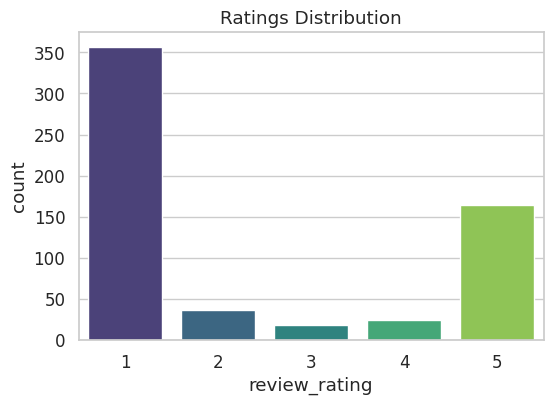

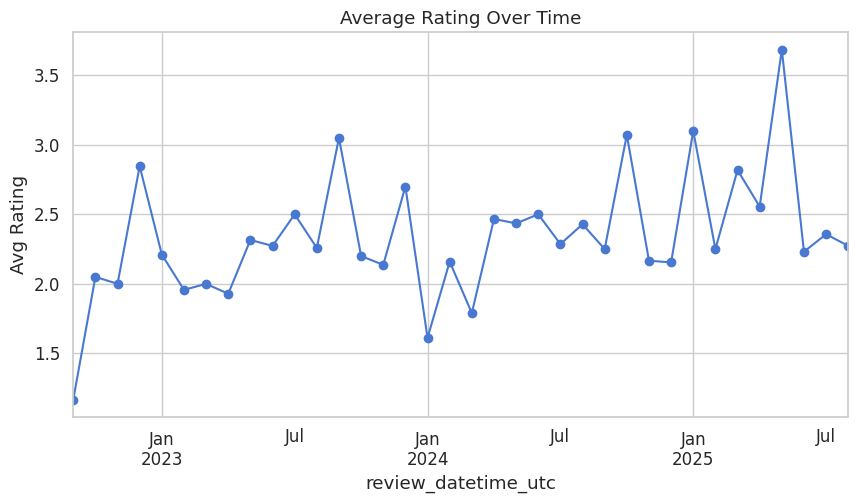

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="review_rating", data=df, palette="viridis")
plt.title("Ratings Distribution")
plt.show()

df.groupby(df['review_datetime_utc'].dt.to_period("M"))['review_rating'].mean().plot(figsize=(10,5), marker="o")
plt.title("Average Rating Over Time")
plt.ylabel("Avg Rating")
plt.show()


# 💬 3. Sentiment Analysis

/var/tmp/ipykernel_4211/3429959399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_group", data=df, order=["Negative","Neutral","Positive"], palette="coolwarm")


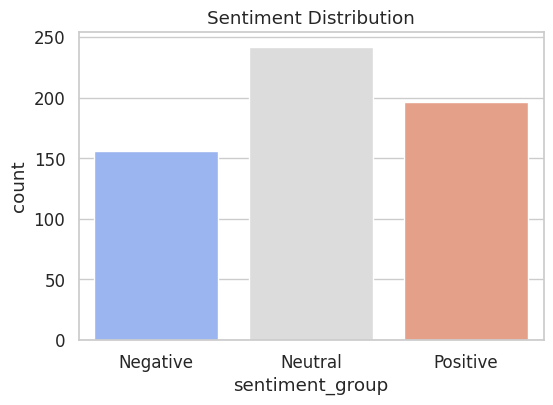

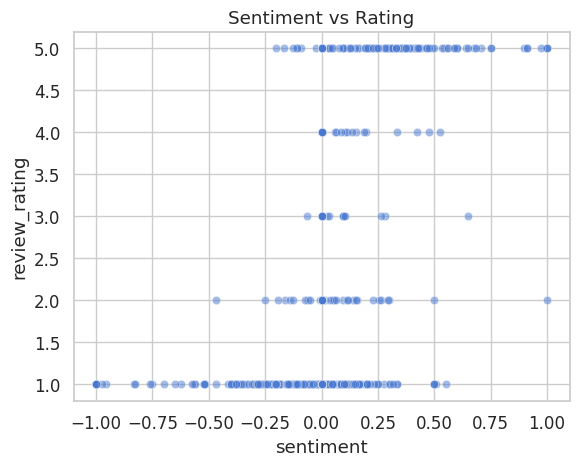

In [26]:
df['sentiment_group'] = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"])

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment_group", data=df, order=["Negative","Neutral","Positive"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

sns.scatterplot(x="sentiment", y="review_rating", data=df, alpha=0.5)
plt.title("Sentiment vs Rating")
plt.show()


# ✍️ 4. Review Length & Engagement

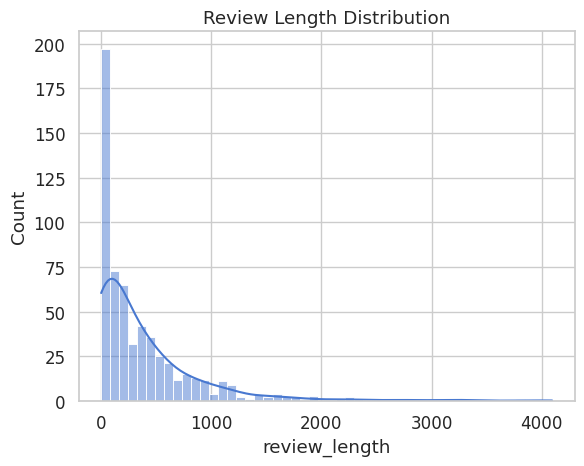

/var/tmp/ipykernel_4211/2932125478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="review_rating", y="review_length", data=df, palette="magma")


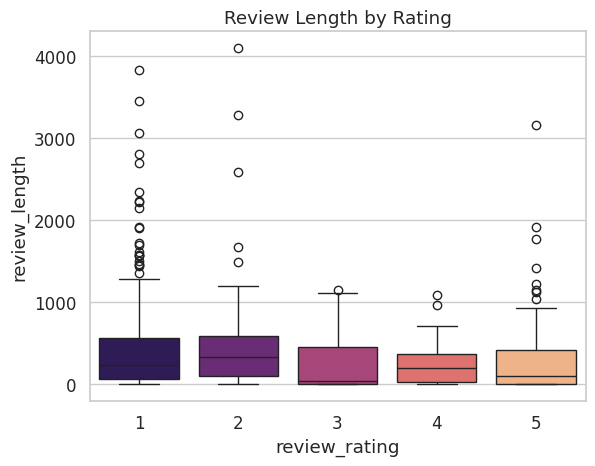

In [27]:
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.show()

sns.boxplot(x="review_rating", y="review_length", data=df, palette="magma")
plt.title("Review Length by Rating")
plt.show()


# 👥 5. Reviewer Behavior

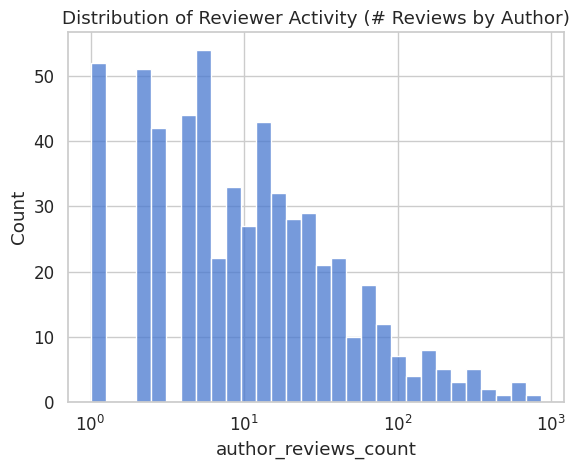

/var/tmp/ipykernel_4211/3163081248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_frequent", y="review_rating", data=df, palette="Set2")


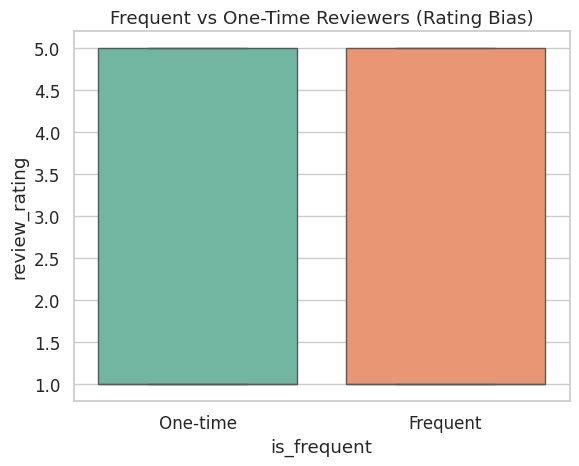

In [28]:
sns.histplot(df['author_reviews_count'], bins=30, log_scale=True)
plt.title("Distribution of Reviewer Activity (# Reviews by Author)")
plt.show()

df['is_frequent'] = df['author_reviews_count'] > 5
sns.boxplot(x="is_frequent", y="review_rating", data=df, palette="Set2")
plt.title("Frequent vs One-Time Reviewers (Rating Bias)")
plt.xticks([0,1], ["One-time","Frequent"])
plt.show()


# 🔁 6. Owner Response Behavior

/var/tmp/ipykernel_4211/3810842962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_rating", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="crest")


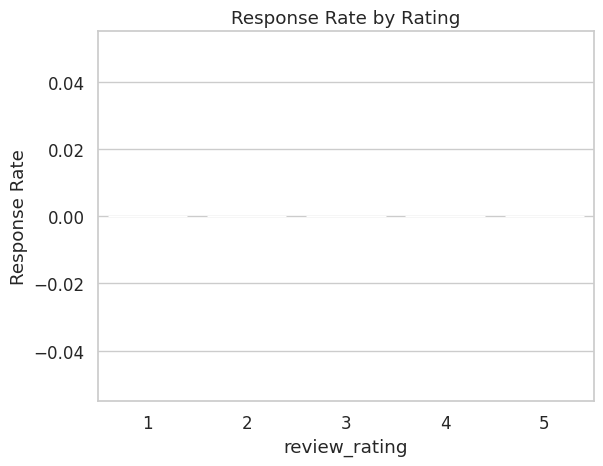

/var/tmp/ipykernel_4211/3810842962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sentiment_group", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="rocket")


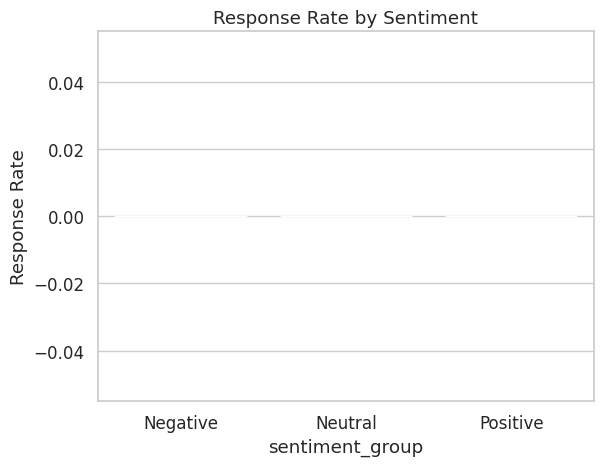

In [29]:
sns.barplot(x="review_rating", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="crest")
plt.title("Response Rate by Rating")
plt.ylabel("Response Rate")
plt.show()

sns.barplot(x="sentiment_group", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="rocket")
plt.title("Response Rate by Sentiment")
plt.ylabel("Response Rate")
plt.show()


# ☁️ 7. Word Cloud & Keywords

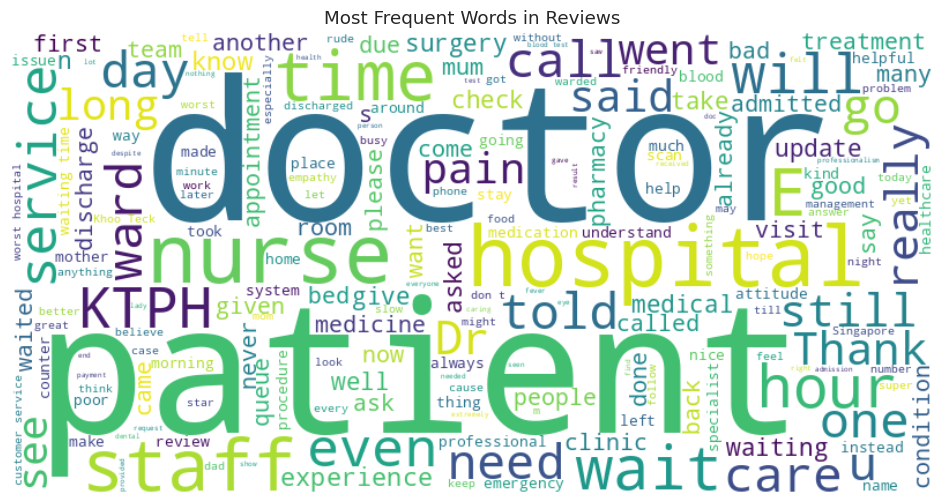

Top Keywords:
      keyword      score
4   hospital  77.193482
1     doctor  53.469289
15      time  49.138626
14     staff  45.255509
13   service  43.351220
17      wait  41.732105
11   patient  41.192058
18   waiting  39.065517
10    nurses  37.994901
6       just  35.634364
5      hours  34.208832
9      nurse  33.523920
12  patients  32.950075
7       ktph  32.863263
3         dr  31.590049
2    doctors  29.266746
0       care  28.017219
19      ward  26.976394
8       like  26.577268
16      told  23.366872


In [30]:
text = " ".join(df['review_text'].dropna().astype(str).values)

wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()

# TF-IDF Keywords
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(df['review_text'].dropna().astype(str))
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)

print("Top Keywords:\n", keywords)


# 🗝 8. Topic Modeling (LDA)

In [31]:
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(df['review_text'].dropna().astype(str))

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

def display_topics(model, feature_names, no_top_words=8):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

display_topics(lda, cv.get_feature_names_out())


Topic 1:  ['nurses', 'dr', 'ward', 'care', 'staff', 'hospital', 'thank', 'doctors']
Topic 2:  ['hospital', 'doctor', 'patient', 'wait', 'worst', 'nurse', 'patients', 'care']
Topic 3:  ['hospital', 'doctor', 'patient', 'time', 'surgery', 'mum', 'just', 'nurse']
Topic 4:  ['doctor', 'hospital', 'said', 'hours', 'time', 'wait', 'told', 'update']
Topic 5:  ['staff', 'time', 'service', 'wait', 'waiting', 'queue', 'pharmacy', 'long']


# 📌 9. KPI Summary (Text Output)

In [32]:
summary = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}
print("📊 KPI Dashboard:\n")
for k,v in summary.items():
    print(f"{k}: {v}")


📊 KPI Dashboard:

Average Rating: 2.34
Average Sentiment: 0.02
Response Rate (%): 0.0
One-time Reviewer %: 8.67
Frequent Reviewer %: 60.33
Avg Review Length: 386.29
Avg Likes: nan


In [33]:
# =============================
# 📌 9. Enhanced KPI Summary
# =============================

summary = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}

# % Rating distribution
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100
for rating, pct in rating_dist.items():
    summary[f"Rating {rating} %"] = round(pct,2)

# % Sentiment distribution
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100
for sentiment, pct in sentiment_dist.items():
    summary[f"{sentiment} Sentiment %"] = round(pct,2)

print("📊 KPI Dashboard:\n")
for k,v in summary.items():
    print(f"{k}: {v}")


📊 KPI Dashboard:

Average Rating: 2.34
Average Sentiment: 0.02
Response Rate (%): 0.0
One-time Reviewer %: 8.67
Frequent Reviewer %: 60.33
Avg Review Length: 386.29
Avg Likes: nan
Rating 1 %: 59.5
Rating 2 %: 6.17
Rating 3 %: 3.0
Rating 4 %: 4.0
Rating 5 %: 27.33
Neutral Sentiment %: 40.74
Positive Sentiment %: 33.0
Negative Sentiment %: 26.26


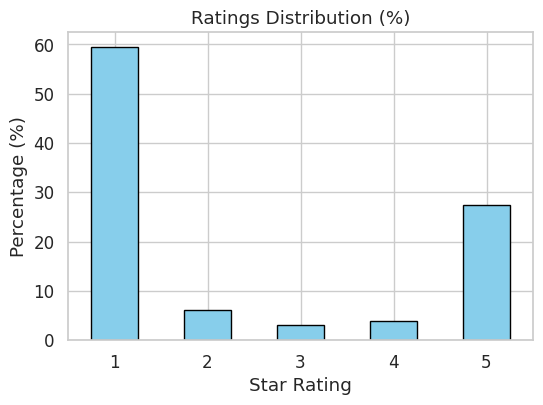

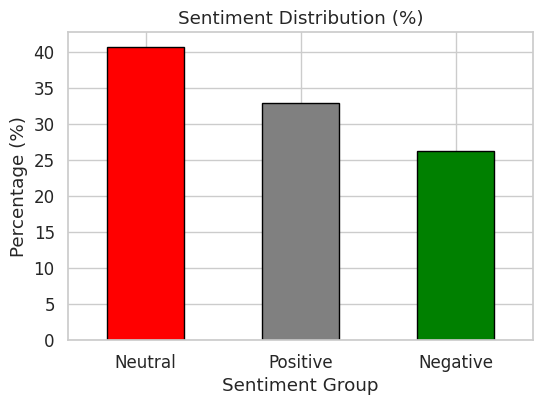

In [34]:
import matplotlib.pyplot as plt

# =============================
# 📊 10. KPI Visualizations
# =============================

# --- Ratings Distribution ---
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
rating_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Ratings Distribution (%)")
plt.xlabel("Star Rating")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

# --- Sentiment Distribution ---
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sentiment_dist.plot(kind='bar', color=['red','grey','green'], edgecolor='black')
plt.title("Sentiment Distribution (%)")
plt.xlabel("Sentiment Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


In [35]:
# =============================
# 📌 11. Top Positive & Negative Reviews
# =============================

# Sort by sentiment score
top_positive = df.sort_values(by='sentiment', ascending=False).head(10)[['review_text','review_rating','sentiment']]
top_negative = df.sort_values(by='sentiment', ascending=True).head(10)[['review_text','review_rating','sentiment']]

print("🔥 Top 10 Positive Reviews (by sentiment):\n")
for i, row in top_positive.iterrows():
    print(f"⭐ Rating: {row['review_rating']} | Sentiment: {round(row['sentiment'],2)}")
    print(row['review_text'])
    print("-"*80)

print("\n⚠️ Top 10 Negative Reviews (by sentiment):\n")
for i, row in top_negative.iterrows():
    print(f"⭐ Rating: {row['review_rating']} | Sentiment: {round(row['sentiment'],2)}")
    print(row['review_text'])
    print("-"*80)


🔥 Top 10 Positive Reviews (by sentiment):

⭐ Rating: 5 | Sentiment: 1.0
Excellent  treatment with care. ❤️
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 1.0
Best excellent and finest place the hospital patient staying.👍👍👍🏥
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 1.0
Best hospital in Singapore
--------------------------------------------------------------------------------
⭐ Rating: 2 | Sentiment: 1.0
not the greatest
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.98
Very nice staff! The food is also great.🤩🤩
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.91
They are very good People 🙂
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.91
It's a very good experience for me
--------------

In [36]:
rating_dist

review_rating
1    59.500000
2     6.166667
3     3.000000
4     4.000000
5    27.333333
Name: proportion, dtype: float64

In [37]:
# --- Base KPI Metrics ---
kpi_data = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}

# Rating % Distribution
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100
for rating, pct in rating_dist.items():
    kpi_data[f"Rating {rating} %"] = round(pct,2)

# Sentiment % Distribution
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100
for sentiment, pct in sentiment_dist.items():
    kpi_data[f"{sentiment} Sentiment %"] = round(pct,2)

# --- Top Reviews Extraction ---
top_positive = df.sort_values(by='sentiment', ascending=False).head(10)[['review_text','review_rating','sentiment']]
top_negative = df.sort_values(by='sentiment', ascending=True).head(10)[['review_text','review_rating','sentiment']]

# Convert reviews into a single string (shortened for table)
pos_reviews_str = "\n\n".join([f"⭐{row['review_rating']} (sent={round(row['sentiment'],2)}): {row['review_text'][:150]}..." 
                               for _,row in top_positive.iterrows()])

neg_reviews_str = "\n\n".join([f"⭐{row['review_rating']} (sent={round(row['sentiment'],2)}): {row['review_text'][:150]}..." 
                               for _,row in top_negative.iterrows()])

# Add to KPI data
kpi_data["Top 10 Positive Reviews"] = pos_reviews_str
kpi_data["Top 10 Negative Reviews"] = neg_reviews_str

# --- Final KPI Table ---
kpi_df = pd.DataFrame(list(kpi_data.items()), columns=["Metric","Value"])

# Replace the custom module with standard pandas display
# Instead of: import caas_jupyter_tools
# Instead of: caas_jupyter_tools.display_dataframe_to_user("KPI Dashboard with Reviews", kpi_df)
display(kpi_df)  # This is the standard way to display dataframes in Jupyter notebooks

,Metric,Value
0,Average Rating,2.34
1,Average Sentiment,0.02
2,Response Rate (%),0.0
3,One-time Reviewer %,8.67
4,Frequent Reviewer %,60.33
5,Avg Review Length,386.29
6,Avg Likes,NaN
7,Rating 1 %,59.5
8,Rating 2 %,6.17
9,Rating 3 %,3.0


In [ ]:
# =============================
# 📊 Weekly Ratings Trend
# =============================

# Ensure datetime is parsed
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')

# Resample weekly average ratings
weekly_ratings = df.set_index('review_datetime_utc').resample('W')['review_rating'].mean()

# Plot
plt.figure(figsize=(14,6))
weekly_ratings.plot(marker='o', linewidth=1.5, alpha=0.8)
plt.title("Weekly Average Ratings Over Time")
plt.xlabel("Week")
plt.ylabel("Average Rating")
plt.grid(True, alpha=0.3)
plt.show()
